# Dubizzle Egypt Car Listings – EDA & Data Preparation

<p align="center">
  <img src="dubizzle-cars-logo.png" alt="Dubizzle Cars Logo" width="250"/>
</p>

**Project Author:** Abdelrahman Alaa  
🔗 [www.linkedin.com/in/3bdo-3laa1](https://www.linkedin.com/in/3bdo-3laa1)

---

## 📄 Project Overview

This project involves collecting and analyzing **car listing data from Dubizzle Egypt** ([dubizzle.com.eg](https://www.dubizzle.com.eg)).  
The goal is to prepare a clean, structured dataset suitable for **machine learning models** that can predict car prices or identify trends in the Egyptian automotive market.

The data was scraped using a Python script with `Playwright`, `BeautifulSoup`, and `concurrent.futures`.  
Each car ad was parsed and information like brand, model, fuel type, year, and more was extracted.

---

## 🧾 Dataset Description

Each row in the dataset represents a car listing.  
The selected and cleaned columns are:

| Column Name          | Description |
|----------------------|-------------|
| `source_url`         | Direct URL to the Dubizzle ad |
| `title`              | Full title of the listing (usually includes brand and year) |
| `brand`              | Car brand (e.g. BMW, Toyota) |
| `model`              | Car model (e.g. Corolla, Megane) |
| `year`               | Car's model year |
| `body_type`          | Car body type (e.g. Sedan, SUV) |
| `transmission`       | Transmission type (Manual or Automatic) |
| `fuel_type`          | Type of fuel (e.g. Benzine, Diesel, Electric) |
| `kilometers`         | Mileage driven (in km) |
| `color`              | Car exterior color |
| `seats`              | Number of seats in the vehicle |
| `interior`           | Interior material (e.g. Full Leather, Other) |
| `payment_option`     | Payment type (Cash or Installments) |
| `area`               | Neighborhood or local area of the ad |
| `city`               | City name extracted from location |
| `date_posted_category` | Time-based group for posting (e.g. 'hours ago', 'days ago', 'weeks ago') |
| `price`              | Car price in numeric format (EGP) |

---

## 🧹 Data Cleaning & Preprocessing Summary

- ✅ Removed rows with missing values in critical columns like `price`, `city`.  
- ✅ Cleaned and standardized the `kilometers` column (e.g. replaced `-` with `NaN`).  
- ✅ Split the `location` column into two new columns: `area` and `city`.  
- ✅ Converted `date_posted` to 3 main categories: `hours ago`, `days ago`, `weeks ago`.  
- ✅ Removed `"EGP"` from the `price` column and converted it to `int`.  
- ✅ Filled missing values:
  - `body_type`, `color`, `payment_option`, `seats`, `interior` → filled using the mode (most frequent value).  
  - `model` → filled with `'Unknown'`.  
- ✅ Handled duplicated records to ensure data integrity.  
- ✅ Identified and managed extreme outliers in columns like `price` and `kilometers`.  
- ✅ Reordered columns to make `price` the target (last column).  
- ✅ Exported cleaned dataset to: `dubizzle_cleaned_dataset.csv` (without index column).

---



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
dubizzle_cars_dataset = pd.read_csv('dubizzle_full_dataset.csv')
data = dubizzle_cars_dataset.copy()

In [3]:
data.dropna(how='all', inplace=True)
data.reset_index(drop=True, inplace=True)

In [4]:
data.head()

,source_url,title,price,location,date_posted,fuel_type,kilometers,year,body_type,engine_capacity_cc,transmission,color,doors,seats,payment_option,brand,model,power_hp,air_conditioning,interior,owners,consumption,extra_features
0,https://www.dubizzle.com.eg/en/ad/bmw-325-1992...,BMW 325 1992,"EGP 365,000","Zahraa Al Maadi, Cairo",2 weeks ago,Benzine,195000,1992.0,Sedan,NaN,Manual,Blue- Navy Blue,NaN,NaN,Cash,BMW,325,NaN,A/C manual,NaN,NaN,NaN,NaN
1,https://www.dubizzle.com.eg/en/ad/renault-mega...,Renault Megane 2021,"EGP 790,000","Obour City, Cairo",1 week ago,Benzine,70000,2021.0,Sedan,NaN,Automatic,Gray,4/5,4.0,Cash,Renault,Megane,NaN,Automatic air conditioning 4 zones,Other,NaN,NaN,NaN
2,https://www.dubizzle.com.eg/en/ad/%D8%A7%D9%88...,اوبل فيكترا 1996,"EGP 210,000","Abuu al-Matamer, Beheira",6 days ago,Benzine,180000,1996.0,NaN,NaN,Manual,Burgundy,NaN,NaN,NaN,Opel,Vectra,NaN,NaN,Full Leather,NaN,NaN,NaN
3,https://www.dubizzle.com.eg/en/ad/%D9%85%D9%8A...,ميتسوبيشي لانسر 2017 Mitsubishi Lancer 2017,"EGP 695,000","New Cairo, Cairo",2 days ago,Benzine,135000,2017.0,Sedan,NaN,Automatic,Black,4/5,NaN,Cash,Mitsubishi,Lancer,NaN,NaN,Full Leather,NaN,NaN,NaN
4,https://www.dubizzle.com.eg/en/ad/%D8%A8%D9%89...,بى واى دى سونج بلس 2025,"EGP 1,880,000","Badr City, Cairo",3 days ago,Electric,-,2025.0,Estate,NaN,Automatic,Gray,4/5,5.0,Cash,BYD,Song Plus,NaN,Automatic air conditioning,NaN,NaN,NaN,NaN


In [5]:
data.shape

(8097, 23)

In [6]:
data.columns

Index(['source_url', 'title', 'price', 'location', 'date_posted', 'fuel_type',
       'kilometers', 'year', 'body_type', 'engine_capacity_cc', 'transmission',
       'color', 'doors', 'seats', 'payment_option', 'brand', 'model',
       'power_hp', 'air_conditioning', 'interior', 'owners', 'consumption',
       'extra_features'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8097 entries, 0 to 8096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_url          8097 non-null   object 
 1   title               5034 non-null   object 
 2   price               5027 non-null   object 
 3   location            5026 non-null   object 
 4   date_posted         5032 non-null   object 
 5   fuel_type           5027 non-null   object 
 6   kilometers          5027 non-null   object 
 7   year                5027 non-null   float64
 8   body_type           4624 non-null   object 
 9   engine_capacity_cc  0 non-null      float64
 10  transmission        5027 non-null   object 
 11  color               4945 non-null   object 
 12  doors               2969 non-null   object 
 13  seats               2293 non-null   float64
 14  payment_option      4060 non-null   object 
 15  brand               5025 non-null   object 
 16  model 

In [8]:
# Choose the useful columns for analysis
data_sub = data[[
    'brand', 'model', 'year', 'body_type', 'transmission', 'fuel_type',
    'power_hp', 'kilometers', 'color', 'seats', 'interior',
    'payment_option', 'location', 'date_posted', 'price'
]]

In [9]:
data_sub.shape

(8097, 15)

In [10]:
print(data_sub.isna().all(axis=1).sum())
data_sub.dropna(how='all', inplace=True)
data_sub.reset_index(drop=True, inplace=True)

3065


In [11]:
data_sub.shape

(5032, 15)

In [12]:
data_sub[data_sub['price'].isna()]

,brand,model,year,body_type,transmission,fuel_type,power_hp,kilometers,color,seats,interior,payment_option,location,date_posted,price
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nasr City, Cairo•",6 days ago,NaN
3306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5th Settlement, New Cairo•",3 weeks ago,NaN
4059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5th Settlement, New Cairo•",3 weeks ago,NaN
4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5th Settlement, New Cairo•",3 weeks ago,NaN
4688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5th Settlement, New Cairo•",3 weeks ago,NaN


In [13]:
data_sub = data_sub.dropna(subset=['price'])

In [14]:
data_sub.shape

(5027, 15)

In [15]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5027 entries, 0 to 5031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           5025 non-null   object 
 1   model           4980 non-null   object 
 2   year            5027 non-null   float64
 3   body_type       4624 non-null   object 
 4   transmission    5027 non-null   object 
 5   fuel_type       5027 non-null   object 
 6   power_hp        1555 non-null   float64
 7   kilometers      5027 non-null   object 
 8   color           4945 non-null   object 
 9   seats           2293 non-null   float64
 10  interior        2984 non-null   object 
 11  payment_option  4060 non-null   object 
 12  location        5021 non-null   object 
 13  date_posted     5027 non-null   object 
 14  price           5027 non-null   object 
dtypes: float64(3), object(12)
memory usage: 628.4+ KB


In [16]:
for col in data_sub.columns:
    print(data_sub[col].value_counts())
    print('-'*50)

brand
Mercedes-Benz    590
Hyundai          367
Chevrolet        285
BMW              282
Renault          279
                ... 
Xiaomi             1
Hummer             1
Lamborghini        1
Li Auto            1
Infiniti           1
Name: count, Length: 76, dtype: int64
--------------------------------------------------
model
Lanos       138
C180        110
Sunny        90
Logan        82
Verna        80
           ... 
Coolray       1
CrossFox      1
V 60          1
Palio         1
GX            1
Name: count, Length: 573, dtype: int64
--------------------------------------------------
year
2025.0    581
2024.0    347
2022.0    272
2021.0    241
2023.0    222
2019.0    207
2020.0    192
2010.0    184
2016.0    179
2015.0    177
2017.0    157
2008.0    153
2009.0    146
2018.0    141
2026.0    126
2013.0    123
2007.0    120
2014.0    120
2006.0    108
2011.0    108
2012.0    101
1999.0     88
1997.0     77
2005.0     76
2000.0     75
2001.0     64
1998.0     61
2003.0     58
2002.

In [17]:
# Replace '-' with nulls in the 'kilometers' column
data_sub['kilometers'] = data_sub['kilometers'].replace('-', np.nan)
# Convert it as numeric
data_sub['kilometers'] = pd.to_numeric(data_sub['kilometers'], errors='coerce')
# Filling the nulls with the median value
data_sub['kilometers'].fillna(data_sub['kilometers'].median(), inplace=True)

In [18]:
# Making sure location is a string and drop any leading/trailing spaces
data_sub['location'] = data_sub['location'].astype(str).str.strip()

# Spliting on the last comma into "area" and "city"
data_sub[['area', 'city']] = data_sub['location'].str.rsplit(',', n=1, expand=True)

# Striping whitespace in the new columns
data_sub['area'] = data_sub['area'].str.strip()
data_sub['city'] = data_sub['city'].str.strip()

# No need for the location columns any more
data_sub.drop(columns=['location'], inplace=True)

In [19]:
data_sub[data_sub['city'].isna()]

,brand,model,year,body_type,transmission,fuel_type,power_hp,kilometers,color,seats,interior,payment_option,date_posted,price,area,city
2001,Daewoo,NaN,2001.0,NaN,Automatic,Benzine,NaN,126000.0,NaN,NaN,Full Leather,NaN,1 week ago,"EGP 240,000",nan,None
2051,Volkswagen,NaN,1987.0,NaN,Manual,Benzine,NaN,1.0,White,NaN,Full Leather,NaN,1 week ago,"EGP 165,000",nan,None
2946,Daewoo,Lanos,2006.0,Sedan,Automatic,Benzine,NaN,200000.0,Black,NaN,NaN,Cash,2 weeks ago,"EGP 270,000",nan,None
3670,Citroen,AX,1994.0,NaN,Manual,Benzine,NaN,1.0,NaN,NaN,NaN,NaN,7 hours ago,"EGP 65,000",nan,None
3682,Hyundai,Verna,2010.0,NaN,Manual,Benzine,NaN,270000.0,Black,NaN,NaN,NaN,2 weeks ago,"EGP 285,000",nan,None
4151,Great Wall,Peri,2009.0,NaN,Manual,Benzine,NaN,132000.0,Black,NaN,NaN,NaN,4 days ago,"EGP 210,000",nan,None


In [20]:
data_sub = data_sub.dropna(subset=['city'])

In [21]:
# A function to cotegorize the posted time into 3 categories
def categorize_posted_time(value):
    value = str(value).lower()
    if 'minute' in value or 'hour' in value or '1 day' in value:
        return 'Less than a day'
    elif 'day' in value and int(value.split()[0]) <= 7:
        return 'This week'
    elif 'week' in value or 'weeks' in value:
        return 'Older than a week'
    else:
        return 'Unknown'

# Apply the categorization
data_sub['date_posted_category'] = data_sub['date_posted'].apply(categorize_posted_time)

# drop original column if not needed
data_sub.drop(columns=['date_posted'], inplace=True)

# View the value counts
data_sub['date_posted_category'].value_counts()

date_posted_category
Older than a week    2119
This week            2016
Less than a day       886
Name: count, dtype: int64

In [22]:
# Remove 'EGP', commas, and convert to numeric
data_sub['price'] = data_sub['price'].str.replace('EGP', '', regex=False)
data_sub['price'] = data_sub['price'].str.replace(',', '', regex=False)
data_sub['price'] = pd.to_numeric(data_sub['price'], errors='coerce')

In [23]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5021 entries, 0 to 5031
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 5019 non-null   object 
 1   model                 4976 non-null   object 
 2   year                  5021 non-null   float64
 3   body_type             4623 non-null   object 
 4   transmission          5021 non-null   object 
 5   fuel_type             5021 non-null   object 
 6   power_hp              1555 non-null   float64
 7   kilometers            5021 non-null   float64
 8   color                 4941 non-null   object 
 9   seats                 2293 non-null   float64
 10  interior              2982 non-null   object 
 11  payment_option        4059 non-null   object 
 12  price                 5021 non-null   int64  
 13  area                  5021 non-null   object 
 14  city                  5021 non-null   object 
 15  date_posted_category  5021

In [24]:
data_sub[data_sub['model'].isna()]

,brand,model,year,body_type,transmission,fuel_type,power_hp,kilometers,color,seats,interior,payment_option,price,area,city,date_posted_category
96,Skoda,NaN,1998.0,NaN,Manual,Benzine,NaN,200000.0,NaN,NaN,NaN,NaN,300000,Al Hadrah,Alexandria,Older than a week
220,Daewoo,NaN,2001.0,NaN,Automatic,Benzine,NaN,195000.0,Black,NaN,Full Leather,NaN,300000,6th of October,Giza,Older than a week
261,Daewoo,NaN,2003.0,NaN,Manual,Benzine,NaN,250000.0,White,NaN,NaN,NaN,200000,Bilbeis,Sharqia,Older than a week
291,Daewoo,NaN,2007.0,NaN,Manual,Benzine,NaN,200000.0,Black,NaN,Full Leather,NaN,275000,Wadi al-Natrun,Beheira,Older than a week
405,Daewoo,NaN,1998.0,NaN,Automatic,Benzine,NaN,258000.0,Black,NaN,Full Leather,NaN,240000,Shorouk City,Cairo,This week
517,Daewoo,NaN,2003.0,NaN,Manual,Benzine,NaN,193000.0,NaN,NaN,NaN,NaN,240000,Ain Sukhna,Suez,Older than a week
535,NaN,NaN,2016.0,NaN,Manual,Benzine,NaN,154000.0,Silver,NaN,Full Leather,NaN,255000,Khanka,Qalyubia,Less than a day
632,Changan,NaN,2014.0,NaN,Manual,Benzine,NaN,76000.0,Silver,NaN,NaN,NaN,270000,Heliopolis,Cairo,Older than a week
1066,Hyundai,NaN,2025.0,NaN,Automatic,Benzine,NaN,1400.0,NaN,NaN,NaN,NaN,250000,Abasiya,Cairo,Older than a week
1091,Daewoo,NaN,2000.0,NaN,Manual,Benzine,NaN,280000.0,Red,NaN,NaN,NaN,240000,Al Hadrah,Alexandria,This week


In [25]:
data_sub = data_sub.dropna(subset=['brand'])

In [26]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5031
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 5019 non-null   object 
 1   model                 4976 non-null   object 
 2   year                  5019 non-null   float64
 3   body_type             4623 non-null   object 
 4   transmission          5019 non-null   object 
 5   fuel_type             5019 non-null   object 
 6   power_hp              1555 non-null   float64
 7   kilometers            5019 non-null   float64
 8   color                 4940 non-null   object 
 9   seats                 2293 non-null   float64
 10  interior              2980 non-null   object 
 11  payment_option        4059 non-null   object 
 12  price                 5019 non-null   int64  
 13  area                  5019 non-null   object 
 14  city                  5019 non-null   object 
 15  date_posted_category  5019

In [27]:
data_sub.shape

(5019, 16)

In [28]:
# Fill missing values with mode (most frequent value)
data_sub['body_type'].fillna(data_sub['body_type'].mode()[0], inplace=True)        # Most common body type
data_sub['color'].fillna(data_sub['color'].mode()[0], inplace=True)                # Most common color
data_sub['payment_option'].fillna(data_sub['payment_option'].mode()[0], inplace=True)  # Most common payment method
data_sub['seats'].fillna(data_sub['seats'].mode()[0], inplace=True)                # Most common number of seats
data_sub['interior'].fillna(data_sub['interior'].mode()[0], inplace=True)          # Most common interior type

In [29]:
data_sub.drop(columns=['power_hp'], inplace=True)

In [30]:
# Fill missing 'model' values with the most common model per brand
data_sub['model'] = data_sub.groupby('brand')['model'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [31]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5031
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 5019 non-null   object 
 1   model                 5019 non-null   object 
 2   year                  5019 non-null   float64
 3   body_type             5019 non-null   object 
 4   transmission          5019 non-null   object 
 5   fuel_type             5019 non-null   object 
 6   kilometers            5019 non-null   float64
 7   color                 5019 non-null   object 
 8   seats                 5019 non-null   float64
 9   interior              5019 non-null   object 
 10  payment_option        5019 non-null   object 
 11  price                 5019 non-null   int64  
 12  area                  5019 non-null   object 
 13  city                  5019 non-null   object 
 14  date_posted_category  5019 non-null   object 
dtypes: float64(3), int64(1), o

In [32]:
# Reorder columns with 'price' as the target at the end
column_order = [
    'brand', 'model', 'year', 'body_type', 'transmission', 'fuel_type',
    'kilometers', 'color', 'seats', 'interior', 'payment_option',
    'area', 'city', 'date_posted_category', 'price'  # Target at the end
]

data_sub = data_sub[column_order]

In [33]:
data_sub.head()

,brand,model,year,body_type,transmission,fuel_type,kilometers,color,seats,interior,payment_option,area,city,date_posted_category,price
0,BMW,325,1992.0,Sedan,Manual,Benzine,195000.0,Blue- Navy Blue,5.0,Full Leather,Cash,Zahraa Al Maadi,Cairo,Older than a week,365000
1,Renault,Megane,2021.0,Sedan,Automatic,Benzine,70000.0,Gray,4.0,Other,Cash,Obour City,Cairo,Older than a week,790000
2,Opel,Vectra,1996.0,Sedan,Manual,Benzine,180000.0,Burgundy,5.0,Full Leather,Cash,Abuu al-Matamer,Beheira,This week,210000
3,Mitsubishi,Lancer,2017.0,Sedan,Automatic,Benzine,135000.0,Black,5.0,Full Leather,Cash,New Cairo,Cairo,This week,695000
4,BYD,Song Plus,2025.0,Estate,Automatic,Electric,115500.0,Gray,5.0,Full Leather,Cash,Badr City,Cairo,This week,1880000


In [34]:
# Check for duplicated
data_sub[data_sub.duplicated()]

,brand,model,year,body_type,transmission,fuel_type,kilometers,color,seats,interior,payment_option,area,city,date_posted_category,price
851,Chery,Tiggo 7,2026.0,SUV,Automatic,Benzine,115500.0,Gray,5.0,Full Leather,Cash or Installment,Nasr City,Cairo,Older than a week,1020000
3016,Chevrolet,Pickup/Dababa,2026.0,Pickup,Manual,Diesel,115500.0,White,5.0,Full Leather,Cash or Installment,Marg,Cairo,This week,1735000
3118,Chevrolet,Optra,2010.0,Sedan,Automatic,Benzine,200000.0,Black,5.0,Full Leather,Cash,Haram,Giza,Older than a week,435000
3656,Nissan,Sunny,2026.0,Sedan,Automatic,Benzine,115500.0,Red,5.0,Full Leather,Cash or Installment,Nasr City,Cairo,This week,735000
3742,Hyundai,Excel,1996.0,Other,Manual,Benzine,430000.0,Blue- Navy Blue,5.0,Part Leather,Cash,Sadat,Monufia,Older than a week,115000
4283,Lada,2107,2002.0,Sedan,Manual,Benzine,100000.0,Black,5.0,Full Leather,Cash,Damanhour,Beheira,This week,125000
4470,Suzuki,Swift,2025.0,Hatchback,Automatic,Benzine,115500.0,Gray,5.0,Full Leather,Cash or Installment,Nasr City,Cairo,Older than a week,900000


In [35]:
data_sub.drop_duplicates(inplace=True)

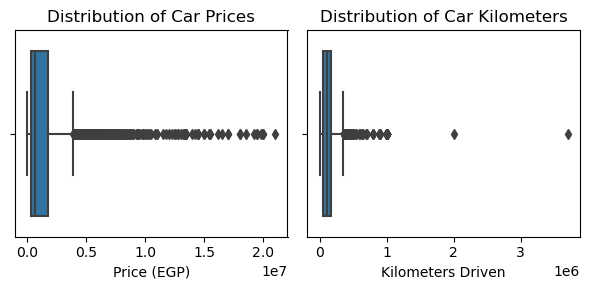

In [36]:
# Check for outliers in the numeric columns.
fig, axis = plt.subplots(1, 2, figsize=(6, 3))

# Boxplot for Price
sns.boxplot(x=data_sub['price'], ax=axis[0])
axis[0].set_title('Distribution of Car Prices')
axis[0].set_xlabel('Price (EGP)')

# Boxplot for Kilometers
sns.boxplot(x=data_sub['kilometers'], ax=axis[1])
axis[1].set_title('Distribution of Car Kilometers')
axis[1].set_xlabel('Kilometers Driven')

plt.tight_layout()
plt.show()

In [37]:
data_sub.shape

(5012, 15)

In [38]:
data_sub['kilometers'] = np.where(data_sub['kilometers'] > 500000, 500000, data_sub['kilometers'])
q_km = data_sub['kilometers'].quantile(0.995)
data_sub = data_sub[data_sub['kilometers'] <= q_km]

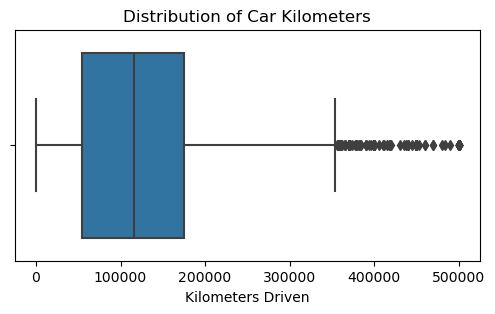

In [39]:
plt.figure(figsize=(6, 3))
ax = sns.boxplot(x=data_sub['kilometers'])
ax.set_title('Distribution of Car Kilometers')
ax.set_xlabel('Kilometers Driven')
plt.show()

In [40]:
data_sub.to_csv('dubizzle_cleaned_dataset.csv', index=False)